# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests 
import random import uniform
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_zone = (-90, 90)
lng_zone = (-180, 180)

# Create a df to lat, lon 
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)

## Generate Cities List

In [28]:

# Randomly generate a list of 1750 cities. Use 50 to test for duplicates.
for x in range(1500):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

#Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()


index      610
City       610
Country    610
dtype: int64

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
#Create a df to add all the data from the API calls.
column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=column_names)


# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
#units =  "metric"



In [30]:
row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        clean_cities_df.set_value(index, "City", city_data["name"])
        clean_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        clean_cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        clean_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        clean_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        clean_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        clean_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        clean_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1

Beginning Data Retrieval


C:\Users\LAXMI\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\LAXMI\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\LAXMI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\LAXMI\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\LAXMI\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a futur

------------------------
Proceesing: City #  1  |  Punta Arenas CL
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=punta+arenas
------------------------
Proceesing: City #  2  |  New Norfolk AU
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=new+norfolk
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  3  |  Saint-Philippe CA
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=saint-philippe
------------------------
Proceesing: City #  4  |  San Patricio PY
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=san+patricio
------------------------
Proceesing: City #  5  |  Torata PE
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=torata
------------------------
Proceesing: Ci

------------------------
Proceesing: City #  47  |  Okhtyrka UA
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=okhtyrka
------------------------
Proceesing: City #  48  |  Buenos Aires AR
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=buenos+aires
------------------------
Proceesing: City #  49  |  Pevek RU
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=pevek
------------------------
Proceesing: City #  50  |  Debre Birhan ET
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=debre+birhan
------------------------
Proceesing: City #  51  |  Kodiak US
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=kodiak
------------------------
Proceesing: City #  52  |  Yellowknife CA
http://api.openweathermap.org/data/2.5/weather?

------------------------
Proceesing: City #  94  |  Ewa Beach US
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=ewa+beach
------------------------
Proceesing: City #  95  |  Tasiilaq GL
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=tasiilaq
------------------------
Proceesing: City #  96  |  Chuy UY
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=chuy
------------------------
Proceesing: City #  97  |  Klyuchi RU
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=klyuchi
------------------------
Proceesing: City #  98  |  Sorland NO
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=sorland
------------------------
Proceesing: City #  99  |  Axim GH
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b0

------------------------
Proceesing: City #  141  |  Salalah OM
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=salalah
------------------------
Proceesing: City #  142  |  Nyurba RU
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=nyurba
------------------------
Proceesing: City #  143  |  Alofi NU
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=alofi
------------------------
Proceesing: City #  144  |  Sistranda NO
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=sistranda
------------------------
Proceesing: City #  145  |  Lazo MD
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=lazo
------------------------
Proceesing: City #  146  |  Hilo US
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b055

Proceesing: City #  186  |  Rawlins US
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=rawlins
City not found, skipping...
------------------------
Proceesing: City #  187  |  Avarua CK
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=avarua
------------------------
Proceesing: City #  188  |  Winnemucca US
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=winnemucca
------------------------
Proceesing: City #  189  |  Vanavara RU
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=vanavara
------------------------
Proceesing: City #  190  |  Stephenville Crossing CA
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=stephenville+crossing
------------------------
Proceesing: City #  191  |  Padang ID
http://api.openweathermap

City not found, skipping...
------------------------
Proceesing: City #  232  |  Cabedelo BR
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=cabedelo
------------------------
Proceesing: City #  233  |  Shar NG
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=shar
------------------------
Proceesing: City #  234  |  Malpe IN
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=malpe
------------------------
Proceesing: City #  235  |  Lulea SE
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=lulea
------------------------
Proceesing: City #  236  |  Gondar PT
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=gondar
------------------------
Proceesing: City #  237  |  Fukue JP
http://api.openweathermap.org/data/2.5/weather?ap

------------------------
Proceesing: City #  278  |  Gamboula CF
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=gamboula
------------------------
Proceesing: City #  279  |  Saraland US
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=saraland
------------------------
Proceesing: City #  280  |  Leningradskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=leningradskiy
City not found, skipping...
------------------------
Proceesing: City #  281  |  Port Blair IN
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=port+blair
------------------------
Proceesing: City #  282  |  Hovd NO
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=hovd
------------------------
Proceesing: City #  283  |  Calabozo VE
http://api.openw

------------------------
Proceesing: City #  323  |  Upernavik GL
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=upernavik
------------------------
Proceesing: City #  324  |  Touros BR
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=touros
------------------------
Proceesing: City #  325  |  Joshimath IN
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=joshimath
------------------------
Proceesing: City #  326  |  Paita PE
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=paita
------------------------
Proceesing: City #  327  |  Kichmengskiy Gorodok RU
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=kichmengskiy+gorodok
------------------------
Proceesing: City #  328  |  Itaberaba BR
http://api.openweathermap.org/d

------------------------
Proceesing: City #  368  |  Neringa LT
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=neringa
City not found, skipping...
------------------------
Proceesing: City #  369  |  Quincy US
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=quincy
------------------------
Proceesing: City #  370  |  Ilesha NG
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=ilesha
------------------------
Proceesing: City #  371  |  Bartica GY
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=bartica
------------------------
Proceesing: City #  372  |  Oneonta US
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=oneonta
------------------------
Proceesing: City #  373  |  Primorsko-Akhtarsk RU
http://api.openweathermap.

------------------------
Proceesing: City #  414  |  Garwolin PL
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=garwolin
City not found, skipping...
------------------------
Proceesing: City #  415  |  Shihezi CN
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=shihezi
------------------------
Proceesing: City #  416  |  Karaton ID
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=karaton
------------------------
Proceesing: City #  417  |  Kurilsk RU
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=kurilsk
------------------------
Proceesing: City #  418  |  Ninotsminda GE
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=ninotsminda
------------------------
Proceesing: City #  419  |  Tura IN
http://api.openweathermap.

------------------------
Proceesing: City #  460  |  Alice Town BS
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=alice+town
------------------------
Proceesing: City #  461  |  Klaksvik FO
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=klaksvik
------------------------
Proceesing: City #  462  |  Coahuayana MX
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=coahuayana
------------------------
Proceesing: City #  463  |  Ambon FR
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=ambon
------------------------
Proceesing: City #  464  |  Nkhata Bay MW
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=nkhata+bay
------------------------
Proceesing: City #  465  |  Kosh-Agach RU
http://api.openweathermap.org/data/2.5/wea

------------------------
Proceesing: City #  506  |  Serebryansk KZ
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=serebryansk
------------------------
Proceesing: City #  507  |  Bethanien NA
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=bethanien
------------------------
Proceesing: City #  508  |  Carutapera BR
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=carutapera
------------------------
Proceesing: City #  509  |  Lata IN
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=lata
------------------------
Proceesing: City #  510  |  Tevaitoa PF
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=tevaitoa
------------------------
Proceesing: City #  511  |  Salinas US
http://api.openweathermap.org/data/2.5/weather?

In [31]:
clean_cities_df.count()

City                541
Country             541
Temperature (F)     541
Latitude            541
Longitude           541
Humidity (%)        541
Cloudiness (%)      541
Wind Speed (mph)    541
dtype: int64

In [52]:
#Reset the index
clean_cities_df = clean_cities_df.reset_index()
del clean_cities_df['index']
clean_cities_df.head(25)

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Punta Arenas,CL,44.6,-53.16,-70.91,70,0,21.92
1,New Norfolk,AU,59,-42.78,147.06,54,75,4.7
2,Saint-Philippe,CA,48.47,45.36,-73.48,100,90,14.79
3,San Patricio,PY,71.51,-26.98,-56.83,96,80,3.71
4,Torata,PE,31.28,-17.08,-70.84,70,32,1.7
5,Ushuaia,AR,48.2,-54.81,-68.31,45,75,5.82
6,Jamestown,AU,72.45,-33.21,138.6,44,0,5.5
7,Kununurra,AU,95,-15.77,128.74,28,0,9.17
8,Fairbanks,US,40.91,64.84,-147.72,99,75,4.7
9,Atuona,PF,79.92,-9.8,-139.03,100,76,18.03


In [ ]:
# Save data to a CSV file
clean_cities_df.to_csv("WeatherPy_analysis/City_data.csv")
#clean_cities_df.to_csv("output_data/cities.csv")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# Save config info
url = "http://api.openweathermap.org/data/2.5/weather"

params = {"appid": "48d1e39ac06f730b05550a70b0db0a95",
          "units": "metric"}

# Use 'for' loop to retrieve weather info by rows in dataframe
for column, row in random_cities_df.iterrows():
    
    # Reference rows for 'q' param
    params["q"] = f'{row["City"]}, {row["Country"]}'
    
    # Get and print links for each city
    print(f'Weather information for {params["q"]}')
    weather_response = req.get(url, params)
    print(weather_response.url)
    weather_response  = weather_response.json()
    
    # Get weather data and input into dataframe
    random_cities_df.set_value(column, "Latitude", weather_response.get("coord", {}).get("lat"))
    random_cities_df.set_value(column, "Longitude", weather_response.get("coord", {}).get("lon"))
    random_cities_df.set_value(column, "Temperature", weather_response.get("main", {}).get("temp_max"))
    random_cities_df.set_value(column, "Wind Speed", weather_response.get("wind", {}).get("speed"))
    random_cities_df.set_value(column, "Humidity", weather_response.get("main", {}).get("humidity"))
    random_cities_df.set_value(column, "Cloudiness", weather_response.get("clouds", {}).get("all"))

In [ ]:
#Build a scatter plot for Latitude vs. Temperature

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Temperature (F)"], c=clean_cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('matplotlib.pyplot')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

NameError: name 'datetime' is not defined

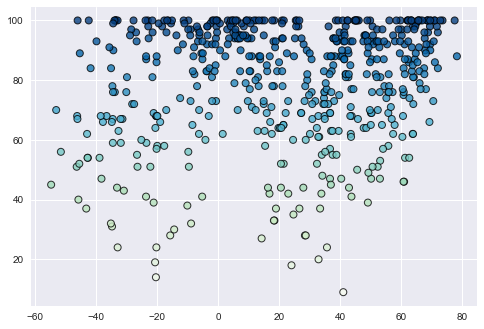

In [63]:
#Build a scatter plot for Latitude vs. Humidity (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Humidity (%)"], c=clean_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='GnBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('matplotlib')
plt.title(f"City Latitude vs. Humidity (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

In [ ]:
#Build a scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Cloudiness (%)"], c=clean_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('matplotlib')
plt.title(f"City Latitude vs. Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Wind Speed (mph)"], c=clean_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('matplotlib')
plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_WindSpeed.png")

# Show plot
plt.show()